### Continous random variables

- Check: https://nbviewer.org/github/marsgr6/EN-online/blob/main/continuous_distributions.ipynb

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Probability density function

$$PDF(X) = f(x) = \frac{x^2}{3}, -1 < x < 2$$

$$\int_{-\infty}^{\infty} f(x) dx = 1$$

$$\int_{-1}^{2} \frac{x^2}{3} dx = \frac{x^3}{9} |_{-1}^{2} = \frac{2^3}{9} - \frac{(-1)^3}{9} =  1$$

$$P(0 \leq X\leq 1) = \int_{0}^{1} \frac{x^2}{3} dx = 1/9$$

(0.1111111111111111, 0.11111116677794466)

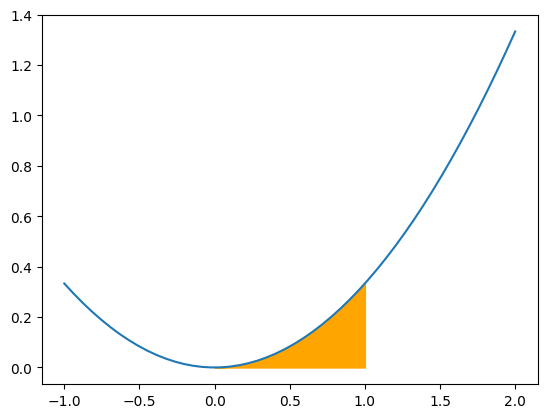

In [9]:
f = lambda x:  x**2 / 3
x = np.linspace(-1, 2)
plt.plot(x, f(x))
x_prob = np.linspace(0, 1, 1000)
plt.fill_between(x_prob, f(x_prob), color="orange")
1/9, np.trapz(f(x_prob), x_prob)

$$P(X=x) = 0$$

$$P(X=0.5) = 0$$

0.0

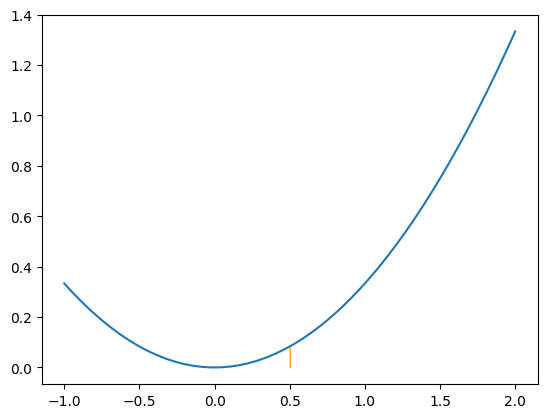

In [16]:
plt.plot(x, f(x))
x_prob = np.linspace(0.5, 0.5, 1000)
plt.fill_between(x_prob, f(x_prob), color="orange")
np.trapz(f(x_prob), x_prob)

### Commulative distribution function

$$CDF:\ F(X) = P(X\leq x) = \int_{-\infty}^{x} f(t) dt$$

$$F(X) = \int_{-1}^{x} t^2 / 3 dt = t^3/9 |_{-1}^{x} = x^3/9 + 1/9$$

$$P(0 \leq X\leq 1) = \int_{0}^{1} \frac{x^2}{3} dx = 1/9$$

$$P(0 \leq X\leq 1) = F(1) - F(0)$$

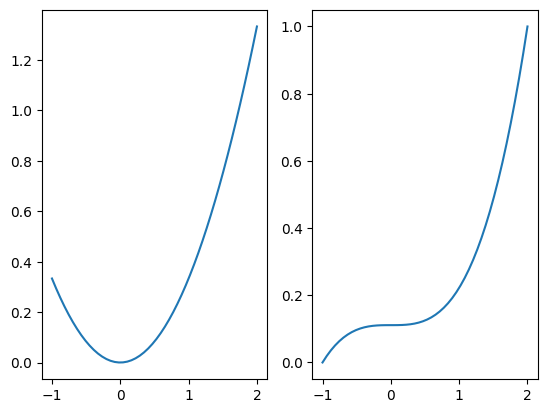

In [19]:
F = lambda x: x**3/9 + 1/9
plt.subplot(1,2,1)
plt.plot(x, f(x))
plt.subplot(1,2,2)
plt.plot(x, F(x))

### Expected value and variance of a continous random variable 

$$ E[X] = \int_{-\infty}^{\infty} x \cdot f(x) dx $$

$$ E[X] = \int_{-1}^{2} x * x^2/3 dx = x^4/12 |_{-1}^{2} = 2^4/12 - (-1)^4/12 = 15/12$$

$$ E[X^2] = \int_{-1}^{2} x^2 * x^2/3 dx = x^5/15 |_{-1}^{2} = 2^5/15 - (-1)^5/15 = 32/15 + 1/15 = 33/15$$

$$Var[X] =  E[X^2] -  (E[X])^2 = 33/15 - (15/12)^2$$

In [28]:
15/12, 33/15 - (15/12)**2

(1.25, 0.6375000000000002)

### Inverse of the CDF (Quantile function)

$$F^{-1}(u) \rightarrow (9u-1)^{1/3}$$

### Inverse transform sampling method

$$u = (x^3+1)/9 \rightarrow (9u-1)^{1/3} = x$$

- Check: https://en.wikipedia.org/wiki/Quantile_function

(1.2496346971468446, 0.6381061672091878)

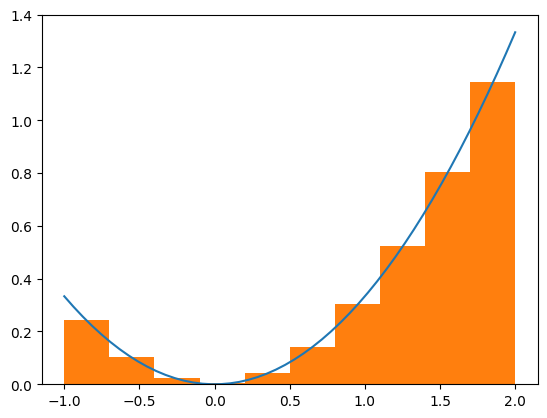

In [29]:
I = lambda u: np.cbrt(9*u - 1)

U = np.random.random(size=1000000)
X = I(U)  # Random vector (simulated)
plt.plot(x, f(x))
h = plt.hist(X, density=True, bins=10)
X.mean(), X.var()

### Rejection method (review hit and miss Monte Carlo)

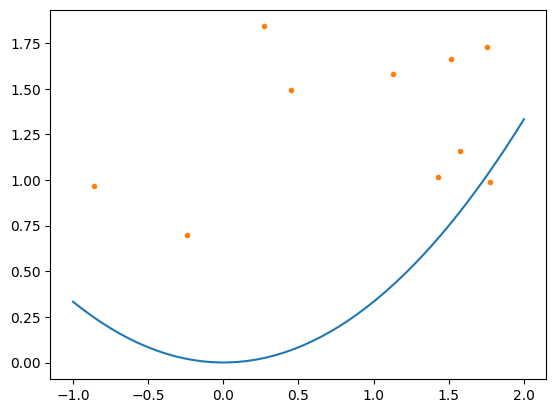

In [36]:
plt.plot(x, f(x))
a, b = -1, 2
c = 2

n = 10  # points
x_r = np.random.random(size=n)*(b-a) + a
y_r = np.random.random(size=n)*c
plt.plot(x_r, y_r, '.')

(1.2484580467182174, 0.6377511975872047)

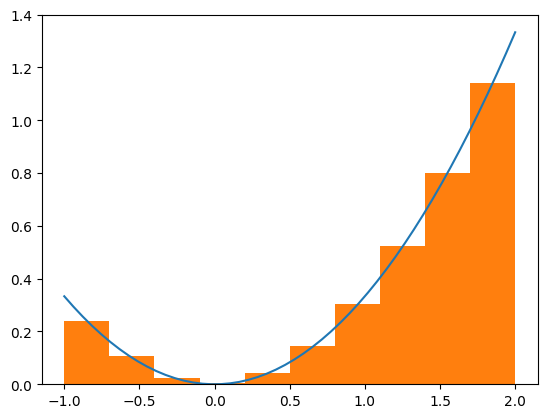

In [41]:
size_X = 100000
X = []
while True:
    x_r = np.random.random()*(b-a) + a
    y_r = np.random.random()*c
    if f(x_r) > y_r:
        X += [x_r]
        if len(X) == size_X: break

X = np.array(X)
plt.plot(x, f(x))
h = plt.hist(X, density=True, bins=10)
X.mean(), X.var()

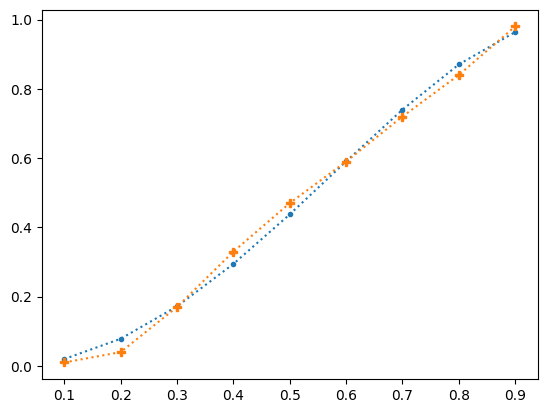

In [70]:
from scipy.stats import bernoulli

def percolation(pb=0.5, number_of_simulations = 100):
    Percola = []
    for i in range(number_of_simulations):
        M = bernoulli.rvs(p=pb, size=(2,2))
        Percola += [(bool(len(np.where(M.sum(axis=1)>=2)[0])))]
    return sum(Percola) / number_of_simulations

p = np.arange(0.1, 1, 0.1)
percolation_theory = p**2*(2-p**2)

plt.plot(p, percolation_theory, ':.')

percolation_sim = []
for probi in p:
    percolation_sim += [percolation(pb=probi)]

plt.plot(p, percolation_sim, ':P')

In [62]:
np.arange(0.1, 1, 0.1)

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=6270f206-ff88-4533-afc5-e2a8c2de37fb' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>